In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 2. Ev fiyatları
Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter notebooku gönderin:

Ev Fiyatları verilerini Kaggle'dan indirin.
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [2]:
ev_fiyatlari = pd.read_csv("data/train.csv", index_col=0)
ev_fiyatlari.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
corr_matrix = ev_fiyatlari.corr()
corr_matrix.SalePrice.sort_values(ascending=False)[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [4]:
y = ev_fiyatlari['SalePrice']

X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.68240707e+02  3.31050771e+01 -6.79087146e+03  1.41737355e+01
  1.98650991e+01  1.49475334e+01  1.04179010e+04  5.12971178e+01
  1.96045898e+04  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661674


In [7]:
X = sm.add_constant(X)

In [8]:
sonuclar = sm.OLS(y, X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:19:13   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Modelin dogrusalligi icin yapacagimiz degerlendirmeler icin OLS isleminde eklenen sabit degerin degistirdigi Değişken sayılarıni duzeltmek icin X degerini eski haline getiriyoruz.**

In [9]:
y = ev_fiyatlari['SalePrice']
X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [10]:
lrm = linear_model.LinearRegression()
lrm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
#Alternatif olarak: 

from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Hata Terimi Ortalamada sifir**

In [12]:
tahmin = lrm.predict(X)

In [13]:
tahmin = lrm.predict(X)
hatalar = y-tahmin

print(" modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))


 modelinin ortalama hatası : 0.000000000047363


In [14]:
X.shape

(1460, 10)

In [15]:
y.shape

(1460,)

Modelin hatalarının ortalaması sıfırdır

**Katsayilarda modelin dogrusalligi**

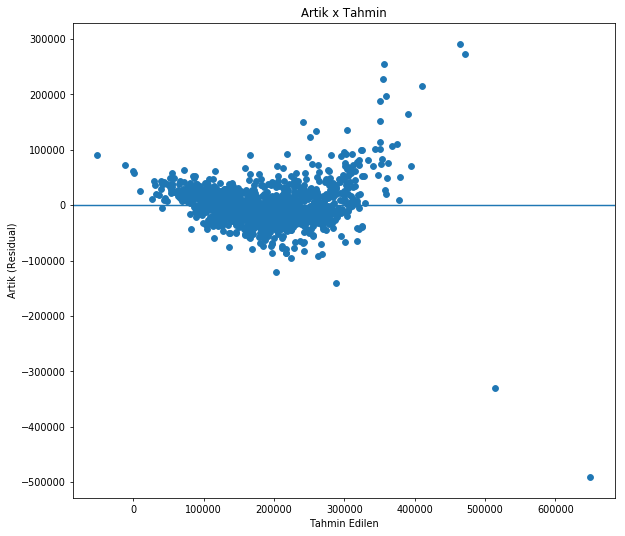

In [16]:
plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

Grafikte hata terimlerinin bir pattern izlemedigini goruyoruz. Modelimizin dogrusal oldugunu soyleyebiliriz.

**Homoscedasticity**

In [17]:
from scipy.stats import bartlett
from scipy.stats import levene

**Bartlett ve Levene**

In [18]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

In [19]:
print("Bartlett test değeri : {0:3g} ve p değeri : {1:.50f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.50f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 519.442 ve p değeri : 0.00000000000000000000000000000000000000000000000000
Levene test değeri   : 525.361 ve p değeri : 0.00000000000000000000000000000000000000000000000000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

**Dusuk Coklu Dogrusallik/low multicollineartiy**

In [20]:
corrArrayX = X.corr().values

In [21]:
np.linalg.eig(corrArrayX)

(array([5.17974356, 1.42790292, 1.08958101, 0.81442138, 0.445324  ,
        0.36372778, 0.28290028, 0.15596539, 0.13591608, 0.10451761]),
 array([[-0.27878501,  0.50000002, -0.09998498,  0.18383844, -0.40555048,
          0.17779282,  0.62823209,  0.16062249, -0.10808875, -0.01566913],
        [-0.27411304, -0.52204748, -0.30282026, -0.06629881,  0.13797929,
         -0.02068129,  0.49680492, -0.26395601,  0.43020921, -0.18761385],
        [-0.31854446, -0.09667293, -0.40260342,  0.15433865, -0.63060156,
         -0.24140546, -0.47389381, -0.12270698,  0.05183345, -0.07085097],
        [-0.31391267, -0.20859236,  0.51491499,  0.2270133 , -0.05238016,
         -0.25560995, -0.0219613 ,  0.60682184,  0.31514485, -0.07186198],
        [-0.30864506, -0.04923944,  0.56765557,  0.30726842, -0.03966432,
          0.02165563,  0.01400939, -0.66472366, -0.17199981,  0.10948519],
        [-0.34123817,  0.16279401,  0.15700339, -0.57715454,  0.06062894,
         -0.13430169, -0.06067961, -0.03503

Ilk array satirinda sifira yakin deger bulunmadigi icin multicollinearty'verilerin temiz oldugunu goruyoruz. 

**Hata Terimleri birbirleriyle iliskisiz olmalidir.**

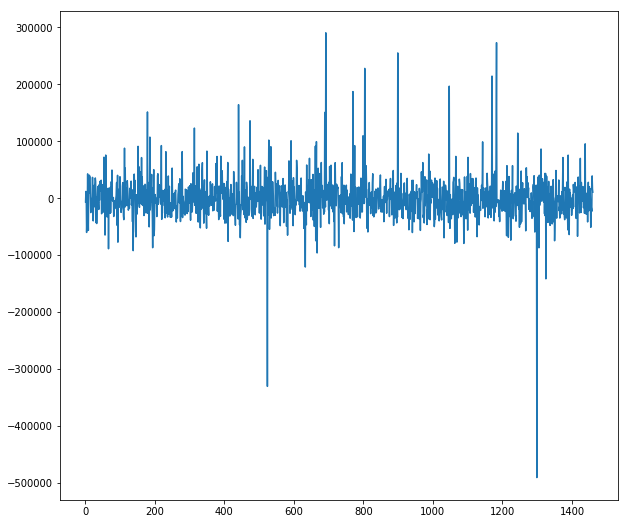

In [22]:
plt.figure(figsize=(10,9))
plt.plot(hatalar) 

Hata terimlerinin iliskisiz oldugunu goruyoruz. 

**Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır.**

In [23]:
from statsmodels.tsa.stattools import acf 

In [24]:
acf_data = acf(hatalar)

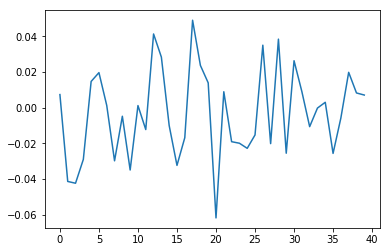

In [25]:
plt.plot(acf_data[1:])

Hata terimleri arasindaki otokorelasyon oldukca dusuktur.

**Ozellikler hatalarla iliskilendirilmemelidir.**

***QQ Grafik***

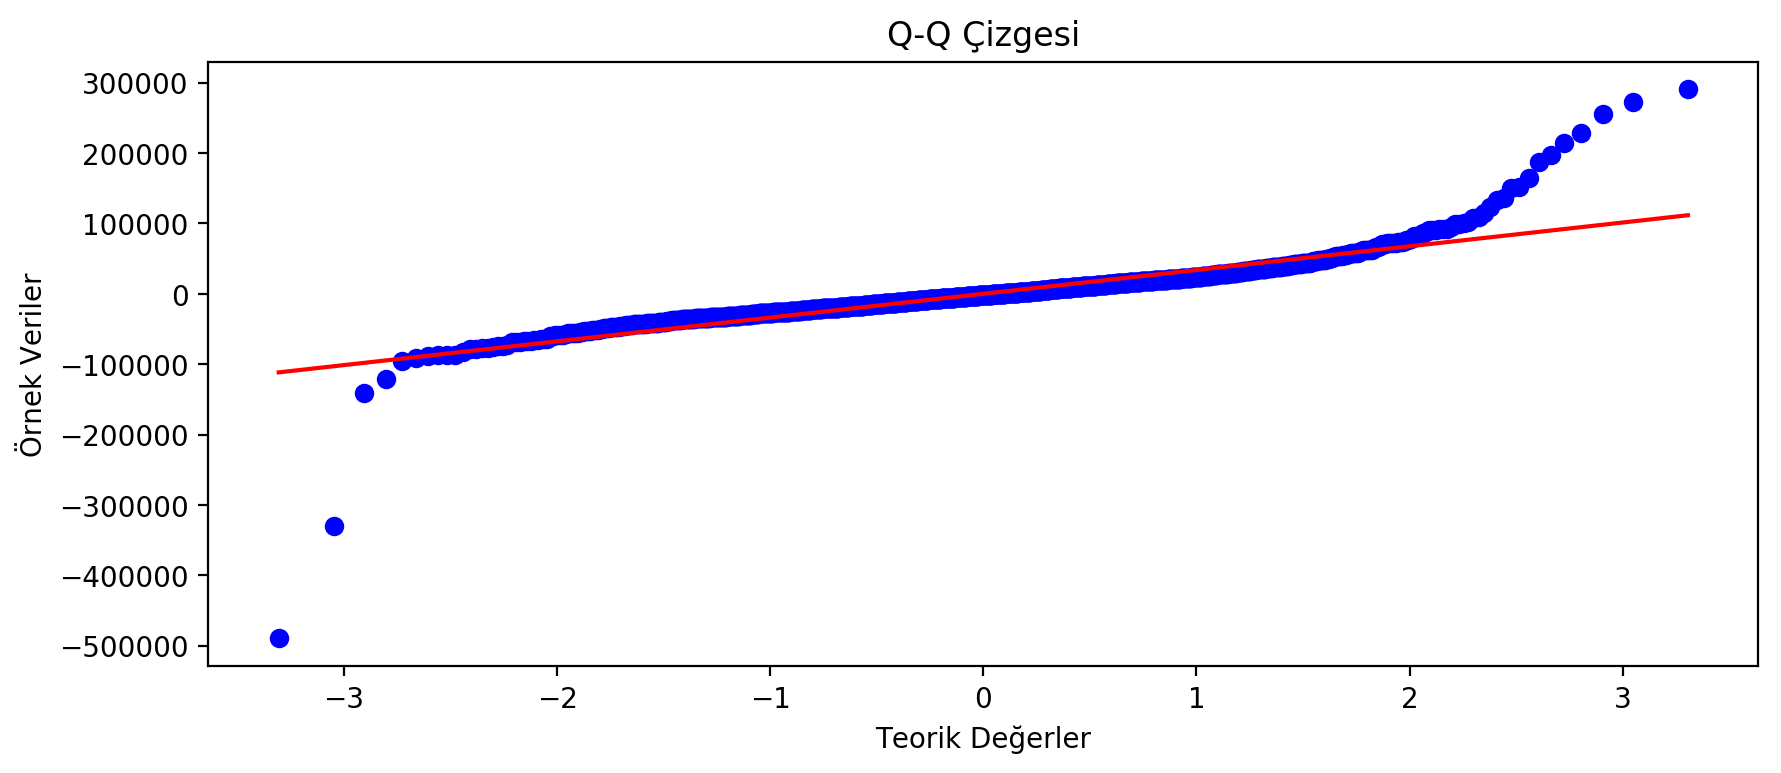

In [26]:
from scipy import stats


plt.figure(figsize=(10,4), dpi = 200)
nsample = 100
res = stats.probplot(hatalar, plot=plt)
plt.title("Q-Q Çizgesi")
plt.xlabel("Teorik Değerler")
plt.ylabel("Örnek Veriler")
plt.show()

***QQ Grafik Seaborn ile***

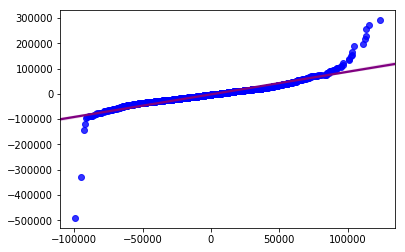

In [27]:
#Burda QQ icin verileri sort ile siralamak durumundayiz. 
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))
sns.regplot(np.sort(rand_nums), np.sort(hatalar),fit_reg=True,  scatter_kws={"color": "blue"}, line_kws={"color": "purple"} )

***Hatalarin Dagilim Grafigi***

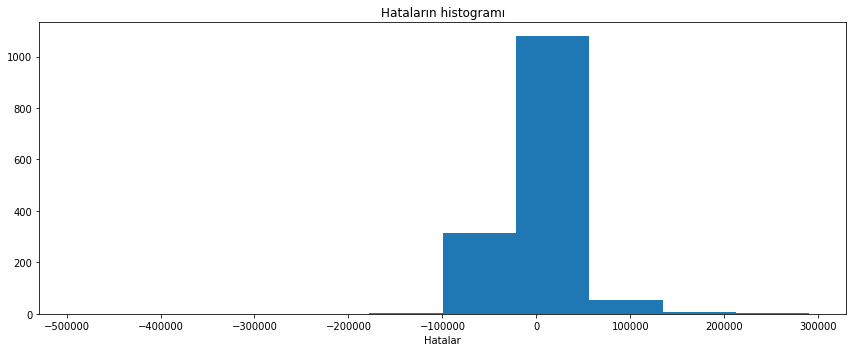

In [28]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))


plt.figure(figsize=(12,5))

plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [29]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [30]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 58906.27914183963 ve p değeri : 0.0
Normal test değeri      : 477.8136160935637  ve p değeri : 0.000000000000000000000000000000


Her iki test de hatalarimizin normal dagilmadigini gosterir. 